<a href="https://colab.research.google.com/github/jyimz/Python_Data_Projects/blob/main/Return_on_Advertising_(ROA)_Analysis_for_Blendo_Games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the spreadsheet
file_path = 'TA1.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the data to understand its structure
data.head()


,Publisher,Keyword,Ad Group,Keyword Type,Clicks,Impressions,CTR,Avg CPC,Total Advertising Cost,Avg Position,Conversions,Revenue per Conversion,Total Revenue
0,Overture,fun games,Kid's Games,exact,245,3705,0.0661,0.38,91.92,1.78,14,117.535033,1645.490458
1,Overture,math games,Math Games,phrase,54,1775,0.0304,0.51,27.73,2.76,5,120.013201,600.066004
2,Overture,For kids games,Kid's Games,broad,70,1019,0.0687,0.25,17.35,2.53,6,100.423288,602.539728
3,Overture,kids games,Kid's Games,phrase,45,963,0.0467,0.21,9.31,3.52,5,114.841613,574.208065
4,Overture,www.games,Kid's Games,broad,5,465,0.0108,0.12,0.60,4.29,0,110.614357,0.000000


In [ ]:
# Grouping the data by Publisher and calculating the total revenue and total advertising cost for each
publisher_summary = data.groupby('Publisher').agg({'Total Revenue': 'sum', 'Total Advertising Cost': 'sum'})

# Calculating the Return on Advertising (ROA) for each publisher
publisher_summary['ROA'] = publisher_summary['Total Revenue'] / publisher_summary['Total Advertising Cost']

# Finding the publisher with the highest ROA
highest_roa_publisher = publisher_summary['ROA'].idxmax()
highest_roa_value = publisher_summary['ROA'].max()

# print(publisher_summary['ROA'])

highest_roa_publisher, highest_roa_value

('Yahoo-US', 118.60965689390163)

1. Which publisher is providing the highest Return on Advertising (ROA) Dollar?  

The publisher providing the highest Return on Advertising (ROA) Dollar for Blendo Games' internet marketing campaign is "Yahoo-US," with an ROA value of approximately 118.61. This means that for every dollar spent on advertising with Yahoo-US, Blendo Games is earning about $118.61 in return.

In [ ]:
# Calculate additional metrics
data['CPM'] = (data['Total Advertising Cost'] / data['Impressions']) * 1000
data['CPA'] = data['Total Advertising Cost'] / data['Conversions']
data['Conversion Rate'] = (data['Conversions'] / data['Clicks']) * 100
data['ROI'] = (data['Total Revenue'] - data['Total Advertising Cost']) / data['Total Advertising Cost']

# Show the calculated metrics
data[['Publisher', 'Keyword', 'Ad Group', 'Avg CPC', 'CPM', 'CPA', 'Clicks', 'CTR', 'Conversion Rate', 'ROI']]

,Publisher,Keyword,Ad Group,Avg CPC,CPM,CPA,Clicks,CTR,Conversion Rate,ROI
0,Overture,fun games,Kid's Games,0.38,24.809717,6.565714,245,0.066100,5.714286,16.901332
1,Overture,math games,Math Games,0.51,15.622535,5.546000,54,0.030400,9.259259,20.639596
2,Overture,For kids games,Kid's Games,0.25,17.026497,2.891667,70,0.068700,8.571429,33.728515
3,Overture,kids games,Kid's Games,0.21,9.667705,1.862000,45,0.046700,11.111111,60.676484
4,Overture,www.games,Kid's Games,0.12,1.290323,inf,5,0.010800,0.000000,-1.000000
...,...,...,...,...,...,...,...,...,...,...
2328,Yahoo-US,math games 8th grade,math games - YU,0.00,0.000000,NaN,0,0.000000,NaN,NaN
2329,Yahoo-US,number math games,math games - YU,0.91,13.188406,inf,1,0.014493,0.000000,-1.000000
2330,Yahoo-US,play free math games.com,math games - YU,0.00,0.000000,NaN,0,0.000000,NaN,NaN
2331,Yahoo-US,math games for kids grade 6,math games - YU,0.07,0.560000,inf,1,0.008000,0.000000,-1.000000


In [ ]:
# Filtering data for Google-Global and Google-US
google_global_data = data[data['Publisher'] == 'Google-Global']
google_us_data = data[data['Publisher'] == 'Google-US']

# Combining the data for Google-Global and Google-US
combined_google_data = pd.concat([google_global_data, google_us_data])

# Summarizing key metrics for Google-Global and Google-US
google_global_summary = google_global_data[['CTR', 'Conversion Rate', 'ROI', 'Avg CPC', 'CPA']].mean()
google_us_summary = google_us_data[['CTR', 'Conversion Rate', 'ROI', 'Avg CPC', 'CPA']].mean()

# Calculating average metrics for Google's ad campaign
google_avg_metrics = combined_google_data.agg({'CTR': 'mean', 'Conversions': 'mean', 'Revenue per Conversion': 'mean', 'Impressions': 'mean'})

google_avg_metrics, google_global_summary, google_us_summary


(CTR                         0.031036
 Conversions                 1.226601
 Revenue per Conversion    214.412173
 Impressions               130.847291
 dtype: float64,
 CTR                 0.031240
 Conversion Rate    13.322341
 ROI                92.636869
 Avg CPC             0.443443
 CPA                      inf
 dtype: float64,
 CTR                 0.030812
 Conversion Rate    14.472266
 ROI                96.439402
 Avg CPC             0.643170
 CPA                      inf
 dtype: float64)

2. Does Google require an improvement on search side copy? Why/Why Not?

Given the moderate CTR, there's room for improvement in the search side copy to attract more clicks. However, the high conversion rates and ROI suggest that the current ad copy is effective in converting users who click the ads. This indicates that while the ads might not be attracting the maximum possible number of clicks, they are successful in attracting the right audience - those who are more likely to convert.

(CTR                         0.006025
 Conversions                 0.551433
 Revenue per Conversion    164.694895
 Impressions               246.170320
 dtype: float64,
 CTR                  0.005993
 Conversion Rate     20.124127
 ROI                146.570073
 Avg CPC              0.315663
 CPA                       inf
 dtype: float64,
 CTR                  0.006053
 Conversion Rate     24.108528
 ROI                316.231065
 Avg CPC              0.291019
 CPA                       inf
 dtype: float64)

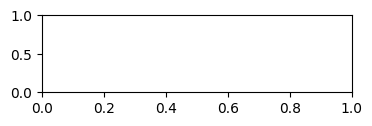

In [ ]:
# Filtering data for Yahoo-Global and Yahoo-US
yahoo_global_data = data[data['Publisher'] == 'Yahoo-Global']
yahoo_us_data = data[data['Publisher'] == 'Yahoo-US']

# Combining the data for Yahoo-Global and Yahoo-US
combined_yahoo_data = pd.concat([yahoo_global_data, yahoo_us_data])

# Summarizing key metrics for Google-Global and Google-US
yahoo_global_summary = yahoo_global_data[['CTR', 'Conversion Rate', 'ROI', 'Avg CPC', 'CPA']].mean()
yahoo_us_summary = yahoo_us_data[['CTR', 'Conversion Rate', 'ROI', 'Avg CPC', 'CPA']].mean()

# Calculating average metrics for Yahoo's ad campaign
yahoo_avg_metrics = combined_yahoo_data.agg({'CTR': 'mean', 'Conversions': 'mean', 'Revenue per Conversion': 'mean', "Impressions": 'mean'})

yahoo_avg_metrics, yahoo_global_summary, yahoo_us_summary


3. Does Yahoo require an improvement on website side copy? Why/Why Not?

Yahoo should improve their website side copy, particularly to enhance CTR. Low CTR suggests that there might be room for improvement in the ad copy to attract more clicks.


In [ ]:
# Filtering data for MSN-Global and MSN-US
msn_global_data = data[data['Publisher'] == 'MSN-Global']
msn_us_data = data[data['Publisher'] == 'MSN-US']

# Combining the data for MSN-Global and MSN-US
combined_msn_data = pd.concat([msn_global_data, msn_us_data])

# Summarizing key metrics for Google-Global and Google-US
msn_global_summary = msn_global_data[['CTR', 'Conversion Rate', 'ROI', 'Avg CPC', 'CPA']].mean()
msn_us_summary = msn_us_data[['CTR', 'Conversion Rate', 'ROI', 'Avg CPC', 'CPA']].mean()

# Calculating average metrics for MSN's ad campaign
msn_avg_metrics = combined_msn_data.agg({'CTR': 'mean', 'Conversions': 'mean', 'Revenue per Conversion': 'mean'})

msn_avg_metrics, msn_global_summary, msn_us_summary


(CTR                         0.003718
 Conversions                 0.594397
 Revenue per Conversion    117.770265
 dtype: float64,
 CTR                  0.003488
 Conversion Rate     68.154161
 ROI                150.782808
 Avg CPC              0.231243
 CPA                       inf
 dtype: float64,
 CTR                  0.004089
 Conversion Rate     45.400169
 ROI                189.677368
 Avg CPC              0.237834
 CPA                       inf
 dtype: float64)

4. The company intends  to increase  funding  for Yahoo but decrease funding  for MSN because Yahoo
has a decent CTR but MSN has the lowest CTR among all publishers. Would you support this decision?
Why/Why not?

While Yahoo's higher CTR is appealing, MSN's strong conversion rates and ROI should not be overlooked. It's important to consider the full context of these metrics. Increasing funding for Yahoo might be beneficial, but reducing MSN's budget could mean losing out on high-value conversions. A balanced approach with targeted optimizations for each platform may yield better overall results.


In [ ]:
# Grouping the data by Keyword Type and calculating the total revenue and total advertising cost for each type
keyword_type_summary = data.groupby('Keyword Type').agg({'Total Revenue': 'sum', 'Total Advertising Cost': 'sum'})

# Calculating the Return on Advertising (ROA) for each keyword type
keyword_type_summary['ROA'] = keyword_type_summary['Total Revenue'] / keyword_type_summary['Total Advertising Cost']

keyword_type_summary


,Total Revenue,Total Advertising Cost,ROA
Keyword Type,,,
broad,160983.651988,1836.14,87.675042
exact,53821.547856,1883.36,28.577408
phrase,115844.543258,1782.40,64.993572


5. The company expects that the exact match and phrase match keywords would provide higher ROA
compared to broad match keywords. While updating their strategy they are thinking about bidding
on only exact and phrase match keywords. Would you support this decision? Why/Why Not?

If the company's ad campaigns are already well-established, with a clear understanding of which keywords drive conversions, and if the budget is more constrained or requires more efficient spending, focusing on exact and phrase match could be beneficial.








In [ ]:
# Filtering data for Google-Global, MSN-Global, and Yahoo-Global
global_data = data[data['Publisher'].isin(['Google-Global', 'MSN-Global', 'Yahoo-Global'])]

# Calculating total metrics for global campaigns
global_campaign_summary = global_data.agg({'Conversions': 'sum', 'Total Revenue': 'sum', 'Total Advertising Cost': 'sum'})

# Calculating the Return on Advertising (ROA) for global campaigns
global_campaign_summary['ROA'] = global_campaign_summary['Total Revenue'] / global_campaign_summary['Total Advertising Cost']

global_campaign_summary


Conversions                 782.000000
Total Revenue             97103.383812
Total Advertising Cost     2098.850000
ROA                          46.265042
dtype: float64

6. The company feels that global audience (targeted through Google ‐Global, MSN Global and Yahoo ‐
Global) does not purchase the products from it and wishes to know if it is worthwhile to still invest
in advertising to global audience. What do you recommend?

Conversions: The number of times users took the desired action (like making a purchase) after clicking on the ad.

Total Revenue: The total revenue generated from these global campaigns.

Total Advertising Cost: The total cost incurred in advertising to the global audience.

Return on Advertising (ROA): Calculated as Total Revenue divided by Total Advertising Cost. This will provide insight into the profitability of the global campaigns.

Total Conversions: 782. This indicates the total number of desired actions (like purchases) achieved through the global campaigns.

Total Revenue: Approximately $97,103.38. This is the revenue generated from the global campaigns.

Total Advertising Cost: Approximately $2,098.85. This is the cost incurred in advertising to the global audience.

Return on Advertising (ROA): Approximately 46.27. This metric shows the return on every dollar spent on advertising.

Continue Global Advertising: The global campaigns are generating a significant ROA of about 46.27, indicating that for every dollar spent, the company is gaining over $46 in return. This is a strong indicator of the effectiveness and profitability of the global campaigns.

Evaluate Conversion Quality: While the ROA is high, it's important to assess the quality of these conversions. If the global audience purchases are in line with the company's profitability and strategic goals (in terms of product types, margins, customer lifetime value, etc.), then continuing to invest in these campaigns is justified.

Consider Campaign Adjustments: If there are concerns about the type of products being purchased or other qualitative aspects of these conversions, the company might consider adjusting the campaigns to better target or exclude specific global markets or product lines.

Review Long-Term Strategy: The decision should align with the company's long-term strategic goals, including market expansion, brand awareness, and customer base diversification.

7. Would the search side strategies that the company should employ be different for US audience and
Global audience? Please explain what the strategies should be.

Yes, the search side strategies should indeed be different for the US audience and the Global audience due to the varying cultural, linguistic, and behavioral differences between these groups.  The US strategy should be highly localized and culturally relevant, whereas the Global strategy needs to be more adaptable and sensitive to a wider range of cultural, linguistic, and regional differences.

8. What strategies would you suggest for improving performance for each of the publishers?

**Google (Global and US)**

Advanced Keyword Strategies: Utilize Google's robust keyword tools for deeper insights. Focus on long-tail keywords for higher conversion rates.

Leverage Google Analytics: Use Google Analytics for detailed insights on user behavior and adjust campaigns accordingly.

Ad Extensions: Utilize ad extensions to provide additional information and increase ad visibility.

Local SEO (for US): For Google-US, emphasize local SEO strategies, including local keywords and Google My Business listings.

Content Optimization: Regularly update website content to be informative, relevant, and keyword-optimized for better organic ranking.

**Yahoo (Global and US)**

Audience Targeting: Leverage Yahoo’s audience insights to target ads based on user interests, demographics, and behaviors.

Native Advertising: Utilize Yahoo’s native advertising platform to create ads that blend seamlessly with content.

Video Content: Explore Yahoo's video advertising options, as video content tends to engage users more effectively.

Mobile Optimization: Ensure ads and landing pages are optimized for mobile devices, considering Yahoo’s significant mobile user base.

**MSN (Global and US)**

Contextual Advertising: Use MSN's contextual ad placements to target users based on the content they are viewing.

Bing Ads Integration: Leverage the integration with Bing for search engine marketing, considering that MSN uses Bing for search results.

Display Advertising: Explore MSN’s display advertising options for broader reach and brand awareness.

Audience Segmentation: Segment the audience based on demographics, interests, and online behaviors for more targeted advertising.

**Common Strategies for All Publishers**

A/B Testing: Continuously test different aspects of your campaigns, including ad copy, images, and call-to-action buttons, to determine what resonates best with your audience.

Performance Analytics: Regularly analyze performance data to understand what works and what doesn’t, and adjust strategies accordingly.

Customer Journey Alignment: Tailor ads and content to different stages of the customer journey, from awareness to conversion.

Budget Optimization: Allocate budgets based on performance data, investing more in high-performing campaigns and publishers.

Responsive Design: Ensure all ads and landing pages are responsive and provide an optimal user experience across all devices.